# Chapter 7 - Moving Beyond Linearity

In Chapter 6 we see that we can improve upon least squares using ridge regression, the lasso, principal components regression, and other techniques. In that setting, the improvement is obtained by reducing the complexity of the linear model, and hence the variance of the estimates.

In this chapter we relax the linearity assumption while still attempting to maintain as much interpretability as possible. We do this by examining very simple extensions of linear models like polynomial regression and step functions, as well as more sophisticated approaches such as splines, local regression, and generalized additive models.

- ***Polynomial regression*** extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, $X, X_2$, and $X_3$, as predictors. This approach provides a simple way to provide a nonlinear fit to data.
- ***Step functions*** cut the range of a variable into $K$ distinct regions in order to produce a qualitative variable. This has the effect of fitting a piecewise constant function.
- ***Regression splines*** are more flexible than polynomials and step functions, and in fact are an extension of the two. They involve dividing the range of $X$ into $K$ distinct regions. Within each region, a polynomial function is fit to the data. However, these polynomials are constrained so that they join smoothly at the region boundaries, or knots. Provided that the interval is divided into enough regions, this can produce an extremely flexible fit. 
- ***Smoothing splines*** are similar to regression splines, but arise in a slightly different situation. Smoothing splines result from minimizing a residual sum of squares criterion subject to a smoothness penalty. 
- ***Local regression*** is similar to splines, but differs in an important way. The regions are allowed to overlap, and indeed they do so in a very smooth way. 
- ***Generalized additive models*** allow us to extend the methods above to deal with multiple predictors. <p>In Sections 7.1–7.6, we present a number of approaches for modeling the relationship between a response $Y$ and a single predictor $X$ in a flexible way. In Section 7.7, we show that these approaches can be seamlessly integrated in order to model a response $Y$ as a function of several predictors $X_1,...,X_p$.

(Page 280). 

## 7.1 Polynomial Regression


Historically, the standard way to extend linear regression to settings in which the relationship between the predictors and the response is nonlinear has been to replace the standard linear model 
$ \large y_i = \beta_0 + \beta_1x_i + \epsilon_i $ with a polynomial function $ \large y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i + ... + \beta_dx^d_i + \epsilon_i$, (7.1) where $\epsilon_i$ is the error term.
This approach is known as ***polynomial regression***, polynomial and in fact we saw an example of this method in Section 3.3.2. For large regression enough degree d, a polynomial regression allows us to produce an extremely non-linear curve.

(Page 280). 

In [2]:
#install.packages('ISLR')
library(ISLR)
attach(Wage)

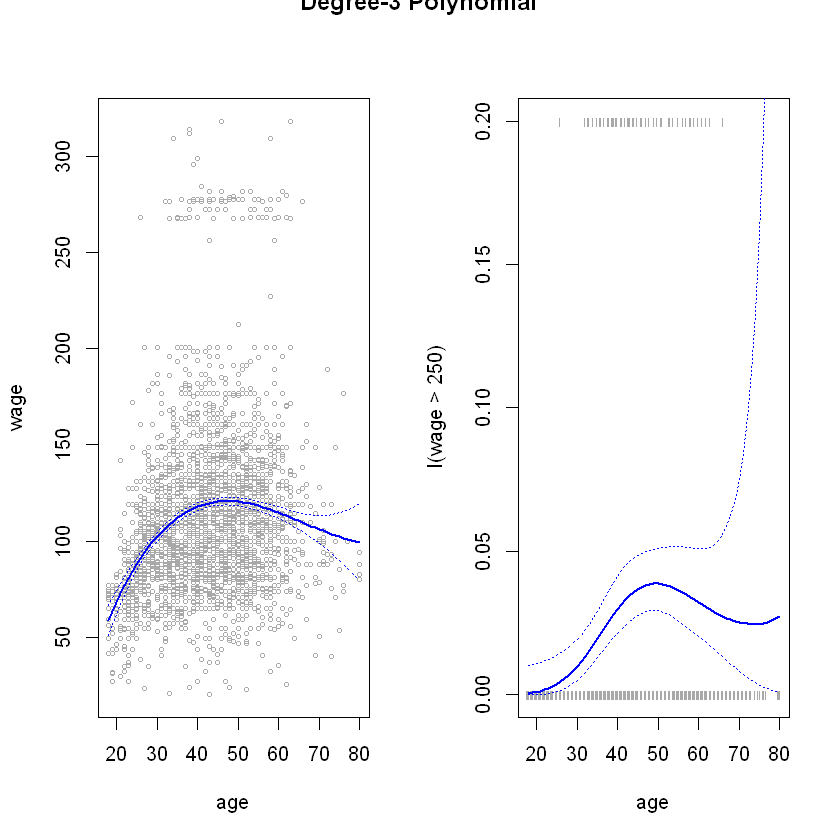

In [3]:
par(mfrow=c(1,2))

fit.3=lm(wage~poly(age,3),data=Wage)
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit.3,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-3 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

fit=glm(I(wage>250)~poly(age,3),data=Wage,family=binomial)
preds=predict(fit,newdata=list(age=age.grid),se=T)
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))
preds=predict(fit,newdata=list(age=age.grid),type="response",se=T)
plot(age,I(wage>250),xlim=agelims,type="n",ylim=c(0,.2))
points(jitter(age), I((wage>250)/5),cex=.5,pch="|",col="darkgrey")
lines(age.grid,pfit,lwd=2, col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

> FIGURE 7.1. The Wage data. Left: The solid blue curve is a degree-4 polynomial of wage (in thousands of dollars) as a function of age, fit by least squares. The dotted curves indicate an estimated 95 % confidence interval. Right: We model the binary event wage>250 using logistic regression, again with a degree-4 polynomial. The fitted posterior probability of wage exceeding $250,000 is shown in blue, along with an estimated 95 % confidence interval.

The left-hand panel in Figure 7.1 is a plot of wage against age for the Wage data set, which contains income and demographic information for males who reside in the central Atlantic region of the United States. We see the results of fitting a degree-4 polynomial using least squares (solid blue curve). Even though this is a linear regression model like any other, the individual coefficients are not of particular interest. Instead, we look at the entire fitted function across a grid of 62 values for age from 18 to 80 in order to understand the relationship between age and wage. In Figure 7.1, a pair of dotted curves accompanies the fit; these are (2×) standard error curves. Let’s see how these arise. Suppose we have computed the fit at a particular value of age, x0: <p> $ \LARGE \hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0 + \hat{\beta}_2x^2_0 + \hat{\beta}_3x^3_0 + \hat{\beta}_4x^4_0 $

What is the variance of the fit, i.e. Var $\hat{f}(x_0)$? Least squares returns variance estimates for each of the fitted coefficients $\hat{\beta}_j$, as well as the covariances between pairs of coefficient estimates. We can use these to compute the estimated variance of $\hat{f}(x_0)$. The estimated pointwise standard error of $\hat{f}(x_0)$ is the square-root of this variance. This computation is repeated at each reference point $x_0$, and we plot the fitted curve, as well as twice the standard error on either side of the fitted curve. We plot twice the standard error because, for normally distributed error terms, this quantity corresponds to an approximate 95 % confidence interval. 

It seems like the wages in Figure 7.1 are from two distinct populations: there appears to be a high earners group earning more than $250,000 per annum, as well as a low earners group. We can treat wage as a binary variable by splitting it into these two groups. Logistic regression can then be used to predict this binary response, using polynomial functions of age as predictors. In other words, we fit the model

$ \large Pr(y_i > 250 | x_i) = \LARGE \frac{exp(\beta_0 + \beta_1x_i + \beta_2x^2_i + ... + \beta_dx^d_i )}{1+ exp(\beta_0 + \beta_1x_i + \beta_2x^2_i + ... + \beta_dx^d_i)} $

The result is shown in the right-hand panel of Figure 7.1. The gray marks on the top and bottom of the panel indicate the ages of the high earners and the low earners. The solid blue curve indicates the fitted probabilities of being a high earner, as a function of age. The estimated 95% confidence interval is shown as well. We see that here the confidence intervals are fairly wide, especially on the right-hand side. Although the sample size for this data set is substantial (n = 3,000), there are only 79 high earners, which results in a high variance in the estimated coefficients and consequently wide confidence intervals.

(Page 282). 


## 7.2 Step Functions

Using polynomial functions of the features as predictors in a linear model imposes a global structure on the non-linear function of X. We can instead use step functions in order to avoid imposing such a global structure. Here step function we break the range of X into bins, and fit a different constant in each bin. This amounts to converting a continuous variable into an ordered categorical variable. <p> In greater detail, we create cutpoints c1, c2,...,cK in the range of X, and then construct K + 1 new variables
    
    C0(X) = I(X<c1),
    C1(X) = I(c1 ≤ X<c2), 
    C2(X) = I(c2 ≤ X<c3), 
    . . . 
    CK−1(X) = I(cK−1 ≤ X<cK), 
    CK(X) = I(cK ≤ X),

where I(·) is an indicator function that returns a 1 if the condition is true, indicator and returns a 0 otherwise.

(Page 282). 

## 7.3 Basis Functions

Polynomial and piecewise-constant regression models are in fact special cases of a basis function approach. The idea is to have at hand a fam- basis ily of functions or transformations that can be applied to a variable X: function b1(X), b2(X),...,bK(X). Instead of fitting a linear model in X, we fit the model

$ \LARGE y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + \beta_3b_3(x_i) + ... + \beta_Kb_K(x_i) + \epsilon_i $

Note that the basis functions $b_1(\cdot), b_2(\cdot),...,b_K(\cdot)$ are fixed and known. (In other words, we choose the functions ahead of time.) For polynomial regression, the basis functions are $b_j(x_i) = x_i^j$ , and for piecewise constant functions they are $b_j(x_i) = I(c_j \leq x_i \leq c_{j+1})$. We can think of (7.7) as a standard linear model with predictors $b_1(x_i), b_2(x_i),...,b_K(x_i)$. Hence, we can use least squares to estimate the unknown regression coefficients in (7.7). Importantly, this means that all of the inference tools for linear models that are discussed in Chapter 3, such as standard errors for the coefficient estimates and F-statistics for the model’s overall significance, are available in this setting. 

Thus far we have considered the use of polynomial functions and piecewise constant functions for our basis functions; however, many alternatives are possible. For instance, we can use wavelets or Fourier series to construct basis functions. In the next section, we investigate a very common choice for a basis function: regression splines.

(Page 284). 



## 7.4 Regression Splines

### 7.4.1 Piecewise Polynomials

Instead of fitting a high-degree polynomial over the entire range of X, piecewise polynomial regression involves fitting separate low-degree polynomials  over different regions of X. For example, a piecewise cubic polynomial works by fitting a cubic regression model of the form

$ \LARGE y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i +\beta_3x^3_i + \epsilon_i $

where the coefficients $\beta_0, \beta_1, \beta_2$, and $\beta_3$ differ in different parts of the range of X. The points where the coefficients change are called knots. 

For example, a piecewise cubic with no knots is just a standard cubic polynomial, as in (7.1) with d = 3. A piecewise cubic polynomial with a single knot at a point c takes the form

$ \LARGE y_i = \beta_{01} + \beta_{11}x_i +\beta_{21}x^2_i + \beta_{31}x^3_i + \epsilon_i,$  if  $x_i < c; $

$ \LARGE y_i = \beta_{02} + \beta_{12}x_i + \beta_{22}x^2_i + \beta_{32}x^3_i + \epsilon_i,$  if  $x_i >= c;$

In other words, we fit two different polynomial functions to the data, one on the subset of the observations with $x_i < c$, and one on the subset of the observations with $x_i \geq c$. The first polynomial function has coefficients $\beta_{01}, \beta_{11}, \beta_{21}, \beta_{31}$, and the second has coefficients $\beta_{02}, \beta_{12}, \beta_{22}, \beta_{32}$. Each of these polynomial functions can be fit using least squares applied to simple functions of the original predictor. 

Using more knots leads to a more flexible piecewise polynomial. In general, if we place $K$ different knots throughout the range of $X$, then we will end up fitting $K + 1$ different cubic polynomials. Note that we do not need to use a cubic polynomial. For example, we can instead fit piecewise linear functions. In fact, our piecewise constant functions of Section 7.2 are piecewise polynomials of degree 0! 

The top left panel of Figure 7.3 shows a piecewise cubic polynomial fit to a subset of the Wage data, with a single knot at age=50. We immediately see a problem: the function is discontinuous and looks ridiculous! Since each polynomial has four parameters, we are using a total of eight degrees of freedom in fitting this piecewise polynomial model.

(Page 285). 

### 7.4.2 Constraints and Splines

The top left panel of Figure 7.3 looks wrong because the fitted curve is just too flexible. To remedy this problem, we can fit a piecewise polynomial under the constraint that the fitted curve must be continuous. In other words, there cannot be a jump when age=50. The top right plot in Figure 7.3 shows the resulting fit. This looks better than the top left plot, but the Vshaped join looks unnatural. 

In the lower left plot, we have added two additional constraints: now both the first and second derivatives of the piecewise polynomials are continuous at age=50. In other words, we are requiring that the piecewise polynomial be not only continuous when age=50, but also very smooth. Each constraint that we impose on the piecewise cubic polynomials effectively frees up one degree of freedom, by reducing the complexity of the resulting piecewise polynomial fit. So in the top left plot, we are using eight degrees of freedom, but in the bottom left plot we imposed three constraints (continuity, continuity of the first derivative, and continuity of the second derivative) and so are left with five degrees of freedom. The curve in the bottom left plot is called a cubic spline. 3 In general, a cubic spline with K knots uses a total of 4 + K degrees of freedom.


In Figure 7.3, the lower right plot is a linear spline, which is continuous at age=50. The general definition of a degree-d spline is that it is a piecewise degree-d polynomial, with continuity in derivatives up to degree d − 1 at each knot. Therefore, a linear spline is obtained by fitting a line in each region of the predictor space defined by the knots, requiring continuity at each knot. 

In Figure 7.3, there is a single knot at age=50. Of course, we could add more knots, and impose continuity at each.


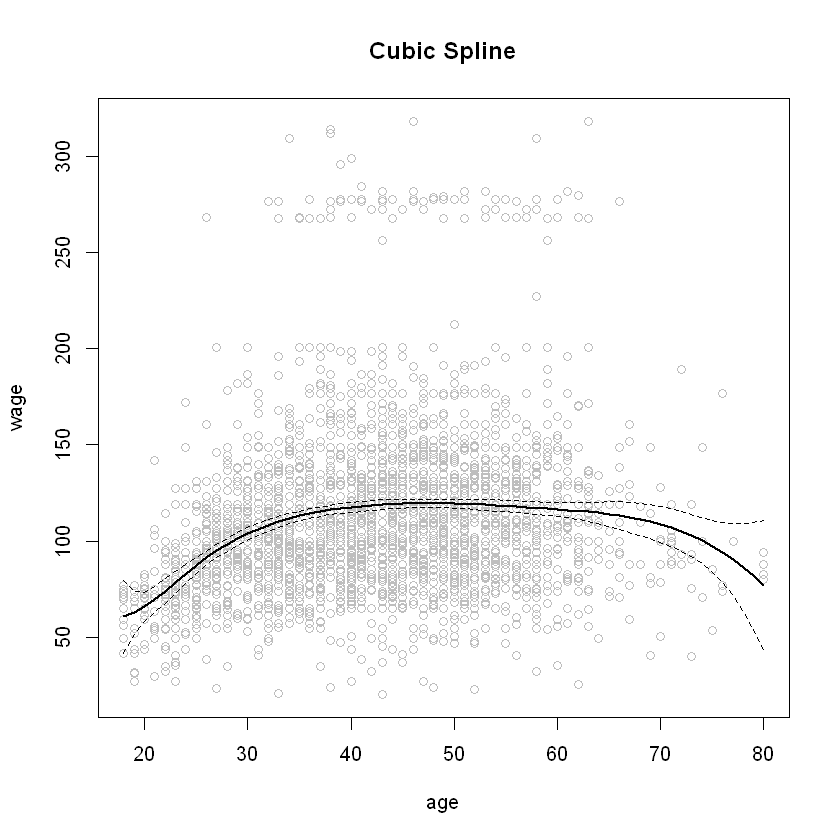

In [4]:
library(splines)
fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
pred=predict(fit,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
title("Cubic Spline")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se,lty="dashed")
lines(age.grid,pred$fit-2*pred$se,lty="dashed")

In [5]:
summary(fit)


Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

![F7.3](image/F7.3.png)

> FIGURE 7.3. Various piecewise polynomials are fit to a subset of the Wage data, with a knot at age=50. ***Top Left***: The cubic polynomials are unconstrained. ***Top Right***: The cubic polynomials are constrained to be continuous at age=50. ***Bottom Left***: The cubic polynomials are constrained to be continuous, and to have continuous first and second derivatives. ***Bottom Right***: A linear spline is shown, which is constrained to be continuous.



### 7.4.3 The Spline Basis Representation



The regression splines that we just saw in the previous section may have seemed somewhat complex: how can we fit a piecewise degree-d polynomial under the constraint that it (and possibly its first d − 1 derivatives) be continuous? It turns out that we can use the basis model (7.7) to represent a regression spline. A cubic spline with K knots can be modeled as

$ \LARGE y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + \dots + \beta_{K+3}b_{K+3}(x_i) + \epsilon_i,$

for an appropriate choice of basis functions $b_1, b_2,...,b_{K+3}$. The model (7.9) can then be fit using least squares. Just as there were several ways to represent polynomials, there are also many equivalent ways to represent cubic splines using different choices of basis functions in (7.9). The most direct way to represent a cubic spline using (7.9) is to start off with a basis for a cubic polynomial—namely, $x, x^2, x^3 $—and then add one truncated power basis function per knot. A truncated power basis function is defined as

$ \LARGE h(x, \xi)=(x-\xi)^3_+ = if \; x>\xi (x-\xi)^3, otherwise \;0$

where $\xi$ is the knot. One can show that adding a term of the form $\beta_{4h}(x, \xi)$ to the model (7.8) for a cubic polynomial will lead to a discontinuity in only the third derivative at $\xi$; the function will remain continuous, with continuous first and second derivatives, at each of the knots. In other words, in order to fit a cubic spline to a data set with K knots, we perform least squares regression with an intercept and $3 + K$ predictors, of the form $X, X^2, X^3, h(X, \xi_1), h(X, \xi_2),...,h(X, \xi_K)$, where $\xi_1,...,\xi_K$ are the knots. This amounts to estimating a total of $K + 4$ regression coeffi- cients; for this reason, fitting a cubic spline with $K $knots uses $ K+4$ degrees of freedom.



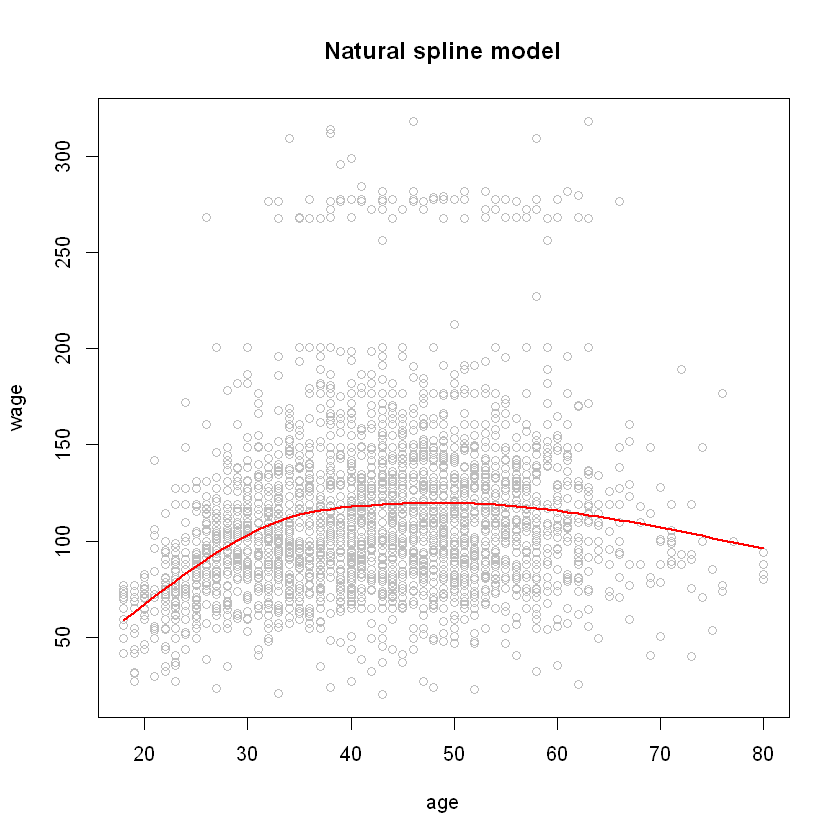

In [6]:
fit2=lm(wage~ns(age,df=4),data=Wage)
pred2=predict(fit2,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
title('Natural spline model')
lines(age.grid, pred2$fit,col="red",lwd=2)

![F7.4](image/F7.4.png)

> FIGURE 7.4. A cubic spline and a natural cubic spline, with three knots, fit to a subset of the Wage data.


Unfortunately, splines can have high variance at the outer range of the predictors—that is, when X takes on either a very small or very large value. Figure 7.4 shows a fit to the Wage data with three knots. We see that the confidence bands in the boundary region appear fairly wild. A natural spline is a regression spline with additional boundary constraints: the function is required to be linear at the boundary (in the region where X is smaller than the smallest knot, or larger than the largest knot). This additional constraint means that*** natural splines generally produce more stable estimates at the boundaries***. In Figure 7.4, a natural cubic spline is also displayed as a red line. Note that the corresponding confidence intervals are narrower.

### 7.4.4 Choosing the Number and Locations of the Knots



When we fit a spline, where should we place the knots? The regression spline is most flexible in regions that contain a lot of knots, because in those regions the polynomial coefficients can change rapidly. Hence, one option is to place more knots in places where we feel the function might vary most rapidly, and to place fewer knots where it seems more stable. While this option can work well, in practice it is common to place knots in a uniform fashion. One way to do this is to specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data. 



![F7.5](image/F7.5.png)

> FIGURE 7.5. A natural cubic spline function with four degrees of freedom is fit to the Wage data. Left: A spline is fit to wage (in thousands of dollars) as a function of age. Right: Logistic regression is used to model the binary event wage>250 as a function of age. The fitted posterior probability of wage exceeding $250,000 is shown.


Figure 7.5 shows an example on the Wage data. As in Figure 7.4, we have fit a natural cubic spline with three knots, except this time the knot locations were chosen automatically as the 25th, 50th, and 75th percentiles
of age. This was specified by requesting four degrees of freedom. The argument by which four degrees of freedom leads to three interior knots is somewhat technical.4 

How many knots should we use, or equivalently how many degrees of freedom should our spline contain? One option is to try out different numbers of knots and see which produces the best looking curve. A somewhat more objective approach is to use cross-validation, as discussed in Chapters 5 and 6. With this method, we remove a portion of the data (say 10 %), fit a spline with a certain number of knots to the remaining data, and then use the spline to make predictions for the held-out portion. We repeat this process multiple times until each observation has been left out once, and then compute the overall cross-validated RSS. This procedure can be repeated for different numbers of knots K. Then the value of K giving the smallest RSS is chosen.

 

![F7.6](image/F7.6.png)

> FIGURE 7.6. Ten-fold cross-validated mean squared errors for selecting the degrees of freedom when fitting splines to the Wage data. The response is wage and the predictor age. Left: A natural cubic spline. Right: A cubic spline.


Figure 7.6 shows ten-fold cross-validated mean squared errors for splines with various degrees of freedom fit to the Wage data. The left-hand panel corresponds to a natural spline and the right-hand panel to a cubic spline. The two methods produce almost identical results, with clear evidence that a one-degree fit (a linear regression) is not adequate. Both curves flatten out quickly, and it seems that three degrees of freedom for the natural spline and four degrees of freedom for the cubic spline are quite adequate.

In Section 7.7 we fit additive spline models simultaneously on several variables at a time. This could potentially require the selection of degrees of freedom for each variable. In cases like this we typically adopt a more pragmatic approach and set the degrees of freedom to a fixed number, say four, for all terms.

(Page 290). 

### 7.4.5 Comparison to Polynomial Regression


Regression splines often give superior results to polynomial regression. This is because unlike polynomials, which must use a high degree (exponent in the highest monomial term, e.g. X15) to produce flexible fits, splines introduce flexibility by increasing the number of knots but keeping the degree fixed. Generally, this approach produces more stable estimates. Splines also allow us to place more knots, and hence flexibility, over regions where the function f seems to be changing rapidly, and fewer knots where f appears more stable. Figure 7.7 compares a natural cubic spline with 15 degrees of freedom to a degree-15 polynomial on the Wage data set. The extra flexibility in the polynomial produces undesirable results at the boundaries, while the natural cubic spline still provides a reasonable fit to the data.

(Page 290). 

![F7.7](image/F7.7.png)

> FIGURE 7.7. On the Wage data set, a natural cubic spline with 15 degrees of freedom is compared to a degree-15 polynomial. Polynomials can show wild behavior, especially near the tails.


## 7.5 Smoothing Splines



### 7.5.1 An Overview of Smoothing Splines


In the last section we discussed regression splines, which we create by specifying a set of knots, producing a sequence of basis functions, and then using least squares to estimate the spline coefficients. We now introduce a somewhat different approach that also produces a spline. 

In fitting a smooth curve to a set of data, what we really want to do is find some function, say g(x), that fits the observed data well: that is, we want $RSS = \sum_{i=1}^n(y_i − g(x_i))^2$ to be small. However, there is a problem with this approach. If we don’t put any constraints on $g(xi)$, then we can always make RSS zero simply by choosing g such that it interpolates all of the yi. Such a function would woefully overfit the data—it would be far too flexible. What we really want is a function g that makes RSS small, but that is also smooth. 

How might we ensure that g is smooth? There are a number of ways to do this. A natural approach is to find the function g that minimizes

$\LARGE \sum_{i=1}^{n}(y_i - g(x_i))^2 + \lambda\int g''(t)^2 2dt $

where $ \lambda $is a nonnegative tuning parameter. The function g that minimizes (7.11) is known as a smoothing spline.

What does (7.11) mean? Equation 7.11 takes the “Loss+Penalty” formulation that we encounter in the context of ridge regression and the lasso in Chapter 6. The term $\sum_{i=1}^{n}(y_i − g(x_i))^2$ is a loss function that encourages g to fit the data well, and the term $\lambda\int g''(t)^2 2dt $ is a penalty term that penalizes the variability in $g$. The notation $g''(t)$ indicates the second derivative of the function $g$. The first derivative $g'(t)$ measures the slope of a function at t, and the second derivative corresponds to the amount by which the slope is changing. Hence, broadly speaking, the second derivative of a function is a measure of its roughness: it is large in absolute value if $g(t) $ is very wiggly near $t$, and it is close to zero otherwise. (The second derivative of a straight line is zero; note that a line is perfectly smooth.) The $\int$ notation is an integral, which we can think of as a summation over the range of $t$. In other words, $\int g''(t)^2dt$  is simply a measure of the total change in the function  $g'(t)$, over its entire range. If $g$ is very smooth, then $g'(t) $ will be close to constant and $\int g''(t)^2dt$ will take on a small value. Conversely, if $g$ is jumpy and variable then $g'(t)$ will vary significantly and $\int g''(t)^2dt$ will take on a large value. Therefore, in (7.11), $\lambda \int g''(t)^2dt$ encourages $g$ to be smooth. The larger the value of $\lambda$, the smoother $ g$ will be.


When $\lambda = 0$, then the penalty term in (7.11) has no effect, and so the function g will be very jumpy and will exactly interpolate the training observations. When $\lambda \rightarrow \infty$, $g$ will be perfectly smooth—it will just be a straight line that passes as closely as possible to the training points. In fact, in this case,$ g$ will be the linear least squares line, since the loss function in (7.11) amounts to minimizing the residual sum of squares. For an intermediate value of $\lambda, g$ will approximate the training observations but will be somewhat smooth. We see that $\lambda$ controls the bias-variance trade-off of the smoothing spline.


The function $g(x)$ that minimizes (7.11) can be shown to have some special properties: it is a piecewise cubic polynomial with knots at the unique values of $x_1,...,x_n$, and continuous first and second derivatives at each knot. Furthermore, it is linear in the region outside of the extreme knots. In other words, the function g(x) that minimizes (7.11) is a natural cubic spline with knots at $x_1,...,x_n!$ However, it is not the same natural cubic spline that one would get if one applied the basis function approach described in Section 7.4.3 with knots at $x_1,...,x_n $ rather, it is a shrunken version of such a natural cubic spline, where the value of the tuning parameter $\lambda$ in (7.11) controls the level of shrinkage.

### 7.5.2 Choosing the Smoothing Parameter λ


We have seen that ***a smoothing spline is simply a natural cubic spline with knots at every unique value of $x_i$***. It might seem that a smoothing spline will have far too many degrees of freedom, since a knot at each data point allows a great deal of flexibility. But the tuning parameter $\lambda$ controls the roughness of the smoothing spline, and hence the effective degrees of freedom. It is possible to show that as $\lambda$ increases from $0$ to $\infty$, the effective
degrees of freedom, which we write $df\lambda$, decrease from $n$ to 2.

In the context of smoothing splines, why do we discuss effective degrees of freedom instead of degrees of freedom? Usually degrees of freedom refer
to the number of free parameters, such as the number of coefficients fit in a polynomial or cubic spline. Although a smoothing spline has $n$ parameters and hence $n$ nominal degrees of freedom, these n parameters are heavily constrained or shrunk down. Hence $df\lambda$ is a measure of the flexibility of the smoothing spline—the higher it is, the more flexible (and the lower-bias but higher-variance) the smoothing spline. The definition of effective degrees of freedom is somewhat technical. We can write

$\LARGE \hat{g}\lambda = S_\lambda y$,

where $ \hat{g}$ is the solution to (7.11) for a particular choice of $\lambda$—that is, it is a n-vector containing the fitted values of the smoothing spline at the training points $x_1,...,x_n$. Equation 7.12 indicates that the vector of fitted values when applying a smoothing spline to the data can be written as a $n × n$ matrix $S_\lambda$ (for which there is a formula) times the response vector $y$. Then the effective degrees of freedom is defined to be

$\LARGE df_\lambda = \sum_{i=1}^n[S_\lambda]_{ii}$,

the sum of the diagonal elements of the matrix $S_\lambda$. In fitting a smoothing spline, we do not need to select the number or location of the knots—there will be a knot at each training observation, $x_1,...,x_n$. Instead, we have another problem: we need to choose the value of $\lambda$. It should come as no surprise that one possible solution to this problem is cross-validation. In other words, we can find the value of $\lambda$ that makes the cross-validated RSS as small as possible. It turns out that the leaveone-out cross-validation error (LOOCV) can be computed very efficiently for smoothing splines, with essentially the same cost as computing a single fit, using the following formula:

$\LARGE RSS_{cv}(\lambda) = \sum_{i=1}^n({y_i}−{\hat{g}_\lambda^{−i}(x_i)})^2 = \sum_{i=1}^n [\frac {{y_i}−{\hat{g}_\lambda(x_i)}}{1−{[S_\lambda]_{ii}}}]^2 $


The notation $\hat{g}_\lambda^{−i}(x_i)$ indicates the fitted value for this smoothing spline evaluated at $x_i$, where the fit uses all of the training observations except for the ith observation $(x_i, y_i)$. In contrast, $\hat{g}_\lambda(x_i)$ indicates the smoothing spline function fit to all of the training observations and evaluated at $x_i$. This remarkable formula says that we can compute each of these leaveone-out fits using only $ \hat{g}_\lambda,$ the original fit to all of the data! We have a very similar formula (5.2) on page 180 in Chapter 5 for least squares linear regression. Using (5.2), we can very quickly perform LOOCV for the regression splines discussed earlier in this chapter, as well as for least squares regression using arbitrary basis functions.

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

[1] 6.794596

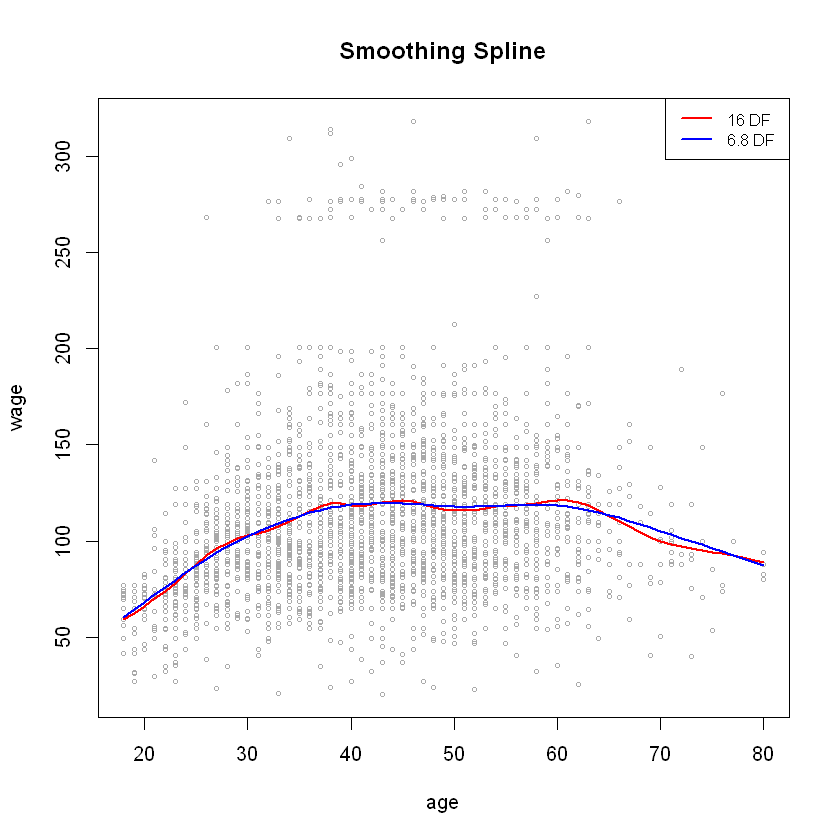

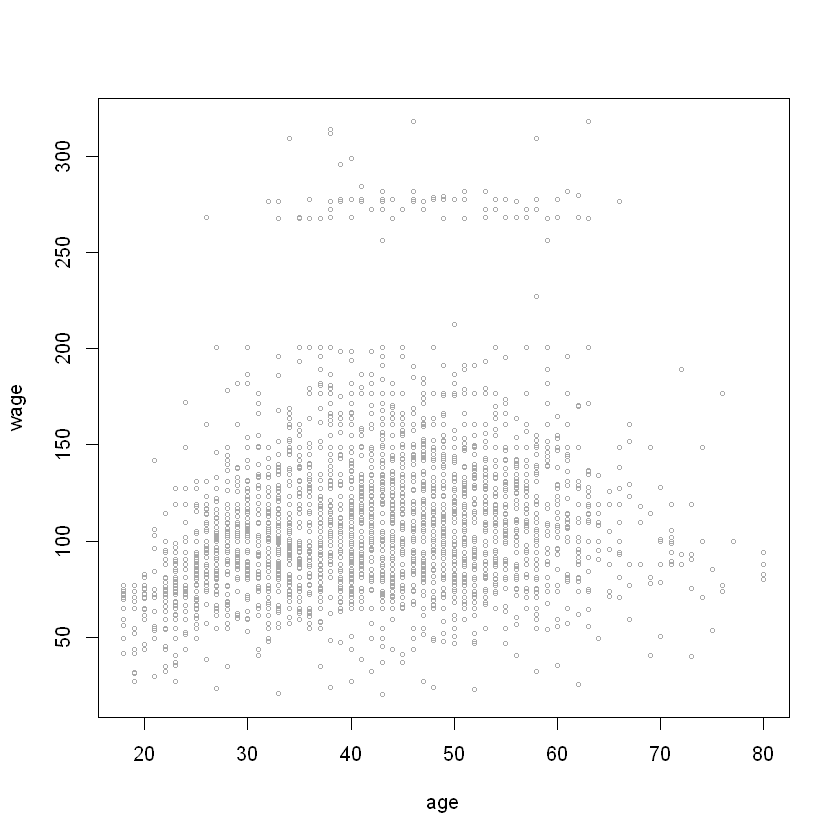

In [7]:
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Smoothing Spline")
fit=smooth.spline(age,wage,df=16)
fit2=smooth.spline(age,wage,cv=TRUE)
fit2$df
lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)
legend("topright",legend=c("16 DF","6.8 DF"),col=c("red","blue"),lty=1,lwd=2,cex=.8)
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")

> FIGURE 7.8. Smoothing spline fits to the Wage data. The red curve results from specifying 16 effective degrees of freedom. For the blue curve, λ was found automatically by leave-one-out cross-validation, which resulted in 6.8 effective degrees of freedom.

Figure 7.8 shows the results from fitting a smoothing spline to the Wage data. The red curve indicates the fit obtained from pre-specifying that we would like a smoothing spline with 16 effective degrees of freedom. The blue curve is the smoothing spline obtained when $\lambda$ is chosen using LOOCV; in this case, the value of $\lambda$ chosen results in 6.8 effective degrees of freedom (computed using (7.13)). For this data, there is little discernible difference between the two smoothing splines, beyond the fact that the one with 16 degrees of freedom seems slightly wigglier. Since there is little difference between the two fits, the smoothing spline fit with 6.8 degrees of freedom is preferable, since in general simpler models are better unless the data provides evidence in support of a more complex model.

(Page 294). 

## 7.6 Local Regression



Local regression is a different approach for fitting flexible non-linear functions, which involves computing the fit at a target point $x_0$ using only the nearby training observations. Figure 7.9 illustrates the idea on some simulated data, with one target point near 0.4, and another near the boundary at 0.05. In this figure the blue line represents the function $f(x)$ from which the data were generated, and the light orange line corresponds to the local regression estimate $\hat{f(x)}$. Local regression is described in Algorithm 7.1. 



![F7.9](image/F7.9.png)

> FIGURE 7.9. Local regression illustrated on some simulated data, where the blue curve represents f(x) from which the data were generated, and the light orange curve corresponds to the local regression estimate ˆf(x). The orange colored points are local to the target point x0, represented by the orange vertical line. The yellow bell-shape superimposed on the plot indicates weights assigned to each point, decreasing to zero with distance from the target point. The fit ˆf(x0) at x0 is obtained by fitting a weighted linear regression (orange line segment), and using the fitted value at x0 (orange solid dot) as the estimate ˆf(x0).



![A7.1](image/A7.1.png)

Note that in Step 3 of Algorithm 7.1, the weights $K_{i0}$ will differ for each value of $x_0$. In other words, in order to obtain the local regression fit at a new point, we need to fit a new weighted least squares regression model by minimizing (7.14) for a new set of weights. Local regression is sometimes referred to as a memory-based procedure, because like nearest-neighbors, we need all the training data each time we wish to compute a prediction. We will avoid getting into the technical details of local regression here—there are books written on the topic.

In order to perform local regression, there are a number of choices to be made, such as how to define the weighting function $K$, and whether to fit a linear, constant, or quadratic regression in Step 3 above. (Equation 7.14 corresponds to a linear regression.) While all of these choices make some difference, the most important choice is the span $ s$, defined in Step 1 above. The span plays a role like that of the tuning parameter $\lambda$ in smoothing splines: it controls the flexibility of the non-linear fit. The smaller the value of s, the more local and wiggly will be our fit; alternatively, a very large value of s will lead to a global fit to the data using all of the training observations. We can again use cross-validation to choose s, or we can specify it directly. Figure 7.10 displays local linear regression fits on the Wage data, using two values of s: 0.7 and 0.2. As expected, the fit obtained using s = 0.7 is smoother than that obtained using s = 0.2. 

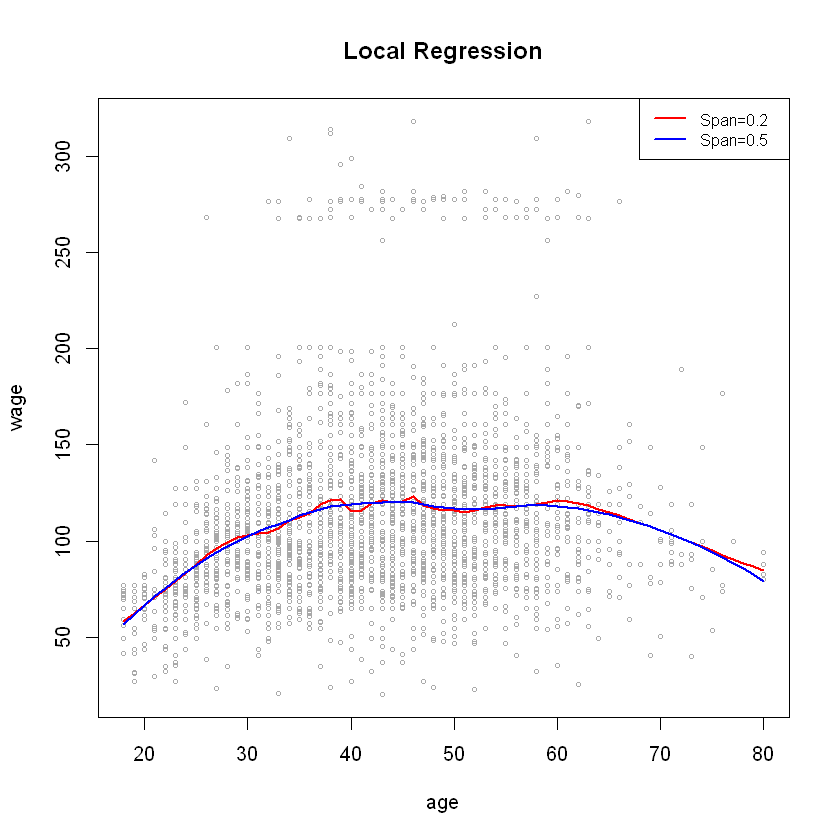

In [8]:
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Local Regression")
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)),col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

> FIGURE 7.10. Local linear fits to the Wage data. The span specifies the fraction of the data used to compute the fit at each target point.



The idea of local regression can be generalized in many different ways. In a setting with multiple features $X_1, X_2,...,X_p$, one very useful generalization involves fitting a multiple linear regression model that is global in some variables, but local in another, such as time. Such varying coefficient models are a useful way of adapting a model to the most recently gathered data. Local regression also generalizes very naturally when we want to fit models that are local in a pair of variables $X_1$ and $X_2$, rather than one. We can simply use two-dimensional neighborhoods, and fit bivariate linear regression models using the observations that are near each target point in two-dimensional space. Theoretically the same approach can be implemented in higher dimensions, using linear regressions fit to p-dimensional neighborhoods. However, local regression can perform poorly if $p$ is much larger than about 3 or 4 because there will generally be very few training observations close to $x_0$. Nearest-neighbors regression, discussed in Chapter 3, suffers from a similar problem in high dimensions.

## 7.7 Generalized Additive Models



In Sections 7.1–7.6, we present a number of approaches for flexibly predicting a response Y on the basis of a single predictor $X$. These approaches can be seen as extensions of simple linear regression. Here we explore the problem of flexibly predicting $Y$ on the basis of several predictors, $X_1,...,X_p$. This amounts to an extension of multiple linear regression. 

Generalized additive models (GAMs) provide a general framework for extending a standard linear model by allowing non-linear functions of each of the variables, while maintaining additivity. Just like linear models, GAMs can be applied with both quantitative and qualitative responses. We first examine GAMs for a quantitative response in Section 7.7.1, and then for a qualitative response in Section 7.7.2.


### 7.7.1 GAMs for Regression Problems



A natural way to extend the multiple linear regression model 

$\LARGE y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ··· + \beta_px_{ip} + \epsilon_i $

in order to allow for non-linear relationships between each feature and the response is to replace each linear component $\beta_jx_{ij}$ with a (smooth) nonlinear function $f_j(x_{ij})$. We would then write the model as 

$\LARGE y_i = \beta0 + \sum_{j=1}^p f_j(x_{ij}) + \epsilon_i $

$\LARGE = \beta_0 + f_1(x_{i1}) + f_2(x_{i2}) + ··· + f_p(x_{ip}) + \epsilon_i$ (7.15) 

This is an example of a GAM. It is called an additive model because we calculate a separate $f_j$ for each $X_j$ , and then add together all of their contributions. 

In Sections 7.1–7.6, we discuss many methods for fitting functions to a single variable. The beauty of GAMs is that we can use these methods as building blocks for fitting an additive model. In fact, for most of the methods that we have seen so far in this chapter, this can be done fairly trivially. Take, for example, natural splines, and consider the task of fitting the model 

$\LARGE wage = \beta_0 + f_1(year) + f_2(age) + f_3(education) + \epsilon$ (7.16)


on the Wage data. Here year and age are quantitative variables, and education is a qualitative variable with five levels: <HS, HS, <Coll, Coll, >Coll, referring to the amount of high school or college education that an individual has completed. We fit the first two functions using natural splines. We fit the third function using a separate constant for each level, via the usual dummy variable approach of Section 3.3.1. 

In [9]:
gam1=lm(wage~ns(year,4)+ns(age,5)+education,data=Wage)

In [10]:
summary(gam1)


Call:
lm(formula = wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.513  -19.608   -3.583   14.112  214.535 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   46.949      4.704   9.980  < 2e-16 ***
ns(year, 4)1                   8.625      3.466   2.488  0.01289 *  
ns(year, 4)2                   3.762      2.959   1.271  0.20369    
ns(year, 4)3                   8.127      4.211   1.930  0.05375 .  
ns(year, 4)4                   6.806      2.397   2.840  0.00455 ** 
ns(age, 5)1                   45.170      4.193  10.771  < 2e-16 ***
ns(age, 5)2                   38.450      5.076   7.575 4.78e-14 ***
ns(age, 5)3                   34.239      4.383   7.813 7.69e-15 ***
ns(age, 5)4                   48.678     10.572   4.605 4.31e-06 ***
ns(age, 5)5                    6.557      8.367   0.784  0.43328    
education2. HS Grad           10.983      2.

![F7.11](image/F7.11.png)

>FIGURE 7.11. For the Wage data, plots of the relationship between each feature and the response, wage, in the fitted model (7.16). Each plot displays the fitted function and pointwise standard errors. The first two functions are natural splines in year and age, with four and five degrees of freedom, respectively. The third function is a step function, fit to the qualitative variable education.



Figure 7.11 shows the results of fitting the model (7.16) using least squares. This is easy to do, since as discussed in Section 7.4, natural splines can be constructed using an appropriately chosen set of basis functions. Hence the entire model is just a big regression onto spline basis variables and dummy variables, all packed into one big regression matrix. 

Figure 7.11 can be easily interpreted. The left-hand panel indicates that holding age and education fixed, wage tends to increase slightly with year; this may be due to inflation. The center panel indicates that holding education and year fixed, wage tends to be highest for intermediate values of age, and lowest for the very young and very old. The right-hand panel indicates that holding year and age fixed, wage tends to increase with education: the more educated a person is, the higher their salary, on average. All of these findings are intuitive. 

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmp88AaFy\downloaded_packages


Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.4"Loaded gam 1.14-4



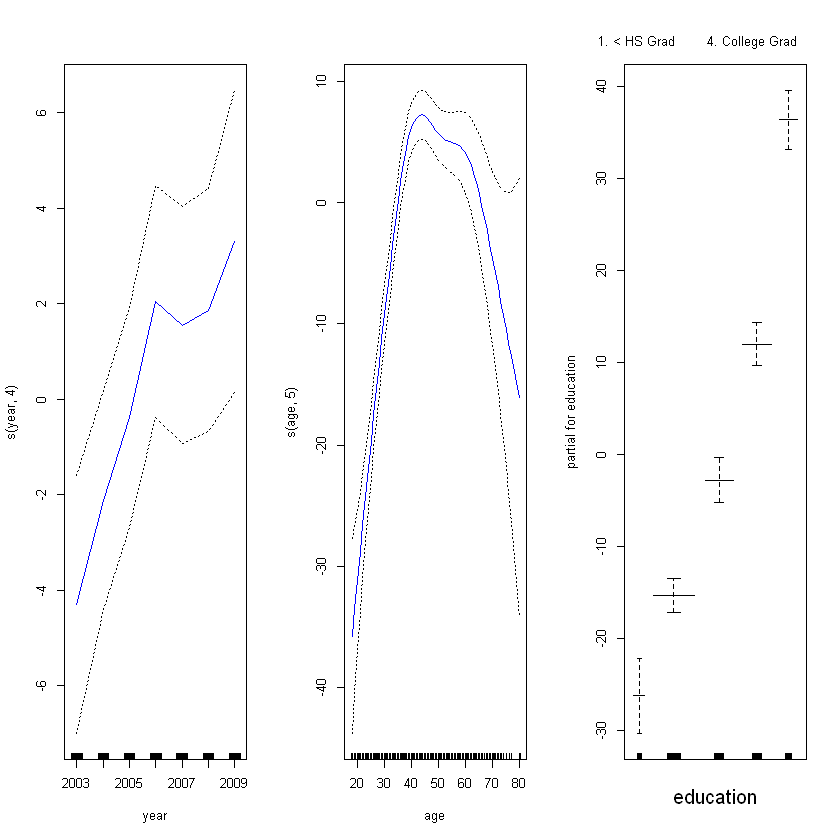

In [11]:
install.packages('gam')
library(gam)
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)
preds=predict(gam.m2,newdata=Wage)

> FIGURE 7.12. Details are as in Figure 7.11, but now f1 and f2 are smoothing splines with four and five degrees of freedom, respectively.



Figure 7.12 shows a similar triple of plots, but this time f1 and f2 are smoothing splines with four and five degrees of freedom, respectively. Fitting a GAM with a smoothing spline is not quite as simple as fitting a GAM with a natural spline, since in the case of smoothing splines, least squares cannot be used. However, standard software such as the gam() function in R can be used to fit GAMs using smoothing splines, via an approach known as backfitting. This method fits a model involving multiple predictors by repeatedly updating the fit for each predictor in turn, holding the others fixed. The beauty of this approach is that each time we update a function, we simply apply the fitting method for that variable to a partial residual. 

The fitted functions in Figures 7.11 and 7.12 look rather similar. In most situations, the differences in the GAMs obtained using smoothing splines versus natural splines are small. 

We do not have to use splines as the building blocks for GAMs: we can just as well use local regression, polynomial regression, or any combination of the approaches seen earlier in this chapter in order to create a GAM. GAMs are investigated in further detail in the lab at the end of this chapter.


#### Pros and Cons of GAMs

Before we move on, let us summarize the advantages and limitations of a GAM.

-  GAMs allow us to fit a non-linear fj to each $X_j$ , so that we can automatically model non-linear relationships that standard linear regression will miss. This means that we do not need to manually try out many different transformations on each variable individually. 
- The non-linear fits can potentially make more accurate predictions for the response $Y$ . 
- Because the model is additive, we can still examine the effect of each $X_j$ on Y individually while holding all of the other variables fixed. Hence if we are interested in inference, GAMs provide a useful representation.
- The smoothness of the function fj for the variable $X_j$ can be summarized via degrees of freedom. 
- The main limitation of GAMs is that the model is restricted to be additive. With many variables, important interactions can be missed. However, as with linear regression, we can manually add interaction terms to the GAM model by including additional predictors of the form $X_j × X_k$. In addition we can add low-dimensional interaction functions of the form $f_{jk}(X_j , X_k)$ into the model; such terms can be fit using two-dimensional smoothers such as local regression, or two-dimensional splines (not covered here).

For fully general models, we have to look for even more flexible approaches such as random forests and boosting, described in Chapter 8. GAMs provide a useful compromise between linear and fully nonparametric models.

(Page 300)

#### Local regression GAM

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"

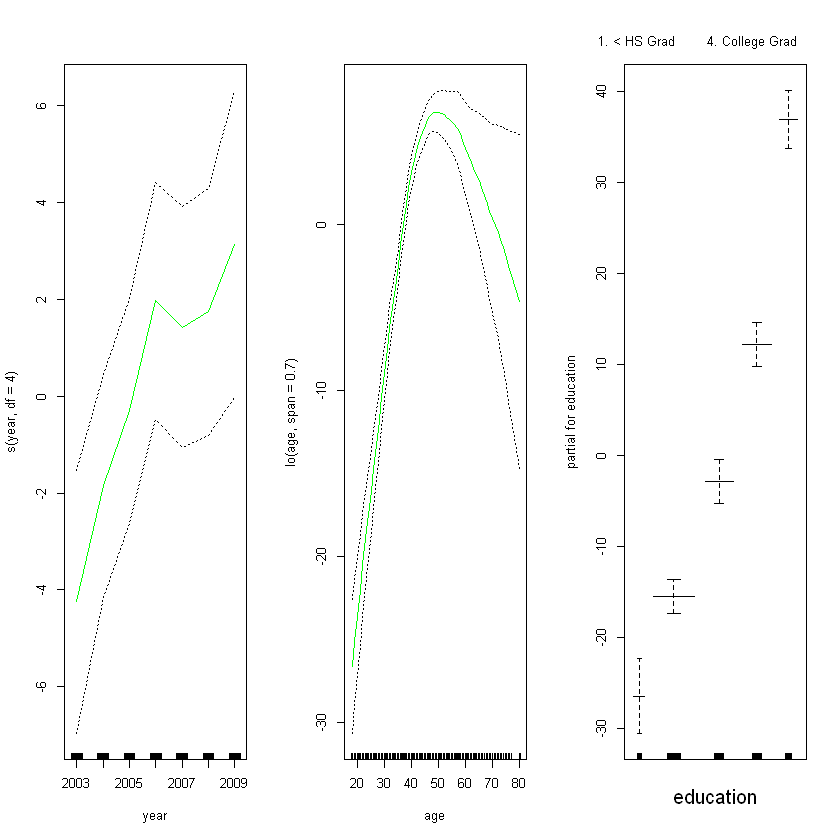

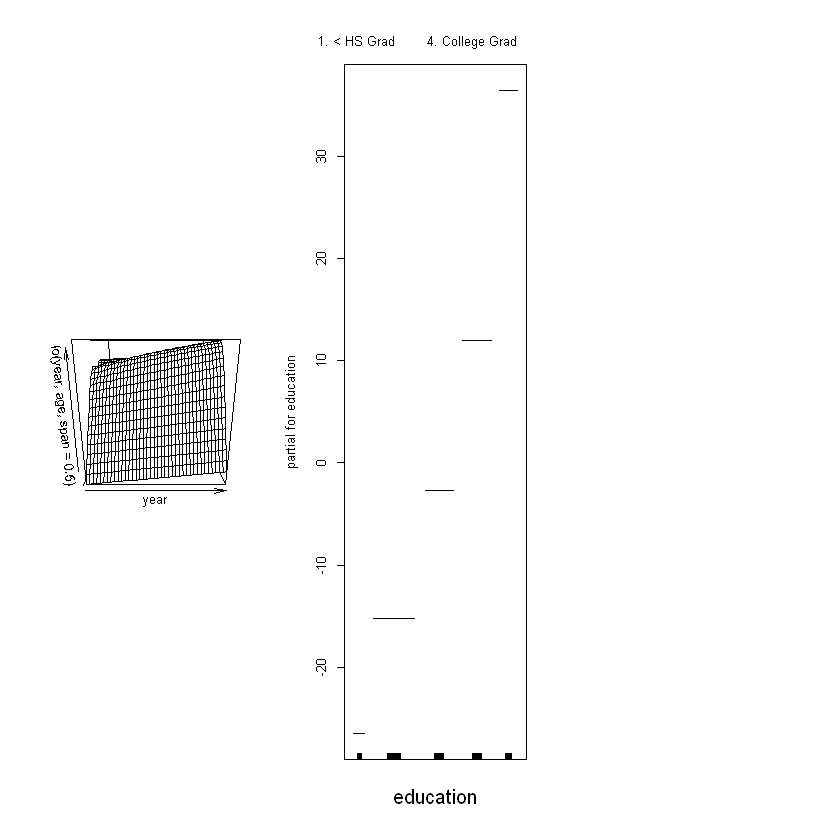

In [12]:
#install.packages('akima')
library(akima)
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam.lo, se=TRUE, col="green")
gam.lo.i=gam(wage~lo(year,age,span=0.5)+education,data=Wage)

plot(gam.lo.i)

### 7.7.2 GAMs for Classification Problems



GAMs can also be used in situations where Y is qualitative. For simplicity, here we will assume Y takes on values zero or one, and let $p(X) = Pr(Y = 1|X)$ be the conditional probability (given the predictors) that the response equals one. Recall the logistic regression model (4.6):

$\LARGE log(\frac{p(X)}{1 − p(X)}) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ··· + \beta_pX_p$ (7.17)

This logit is the log of the odds of $P(Y = 1|X)$ versus $P(Y = 0|X)$, which (7.17) represents as a linear function of the predictors. A natural way to extend (7.17) to allow for non-linear relationships is to use the model 

$\LARGE log(\frac {p(X)}{1 − p(X)}) = \beta_0 + f_1(X_1) + f_2(X_2) + ··· + f_p(X_p)$ (7.18)

Equation 7.18 is a logistic regression GAM. It has all the same pros and cons as discussed in the previous section for quantitative responses. We fit a GAM to the Wage data in order to predict the probability that an individual’s income exceeds $250,000 per year. The GAM that we fit takes the form 

$\LARGE log(\frac{p(X)}{1 − p(X)} = \beta_0 + \beta_1 × year + f_2(age) + f_3(education)$ (7.19) 

where $ p(X) = Pr(wage > 250|year, age, education)$

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

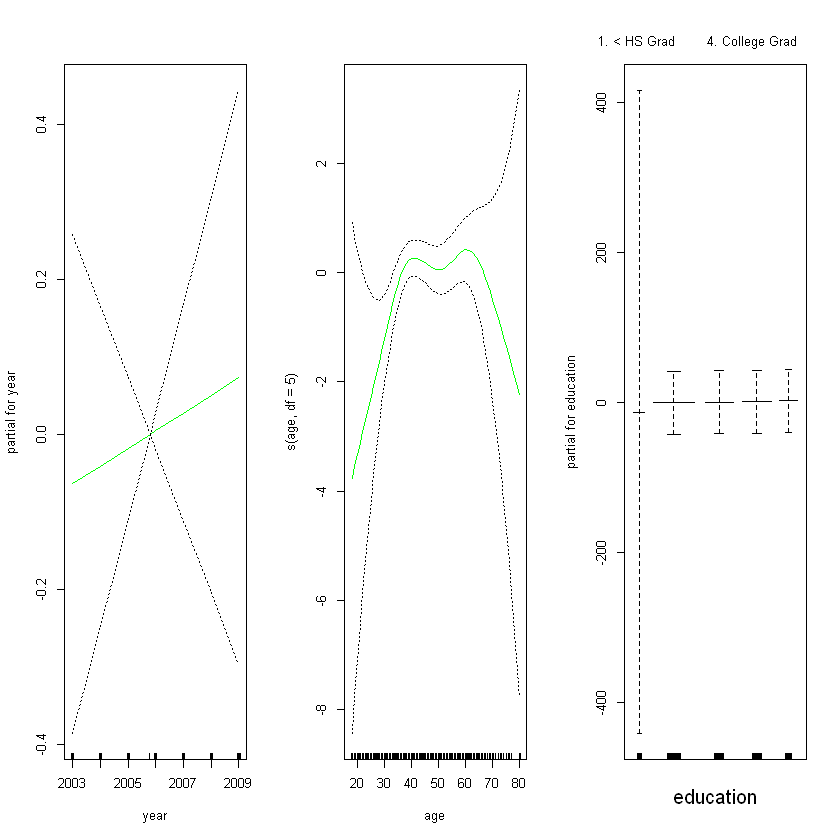

In [17]:
gam.lr=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage)
par(mfrow=c(1,3))
plot(gam.lr,se=T,col="green")
table(education,I(wage>250))

> FIGURE 7.13. For the Wage data, the logistic regression GAM given in (7.19) is fit to the binary response I(wage>250). Each plot displays the fitted function and pointwise standard errors. The first function is linear in year, the second function a smoothing spline with five degrees of freedom in age, and the third a step function for education. There are very wide standard errors for the first level <HS of education.



Once again f2 is fit using a smoothing spline with five degrees of freedom, and f3 is fit as a step function, by creating dummy variables for each of the levels of education. The resulting fit is shown in Figure 7.13. The last panel looks suspicious, with very wide confidence intervals for level <HS. In fact, there are no ones for that category: no individuals with less than a high school education make more than $250,000 per year. Hence we refit the GAM, excluding the individuals with less than a high school education. The resulting model is shown in Figure 7.14. As in Figures 7.11 and 7.12, all three panels have the same vertical scale. This allows us to visually assess the relative contributions of each of the variables. We observe that age and education have a much larger effect than year on the probability of being a high earner.

(Page 301). 

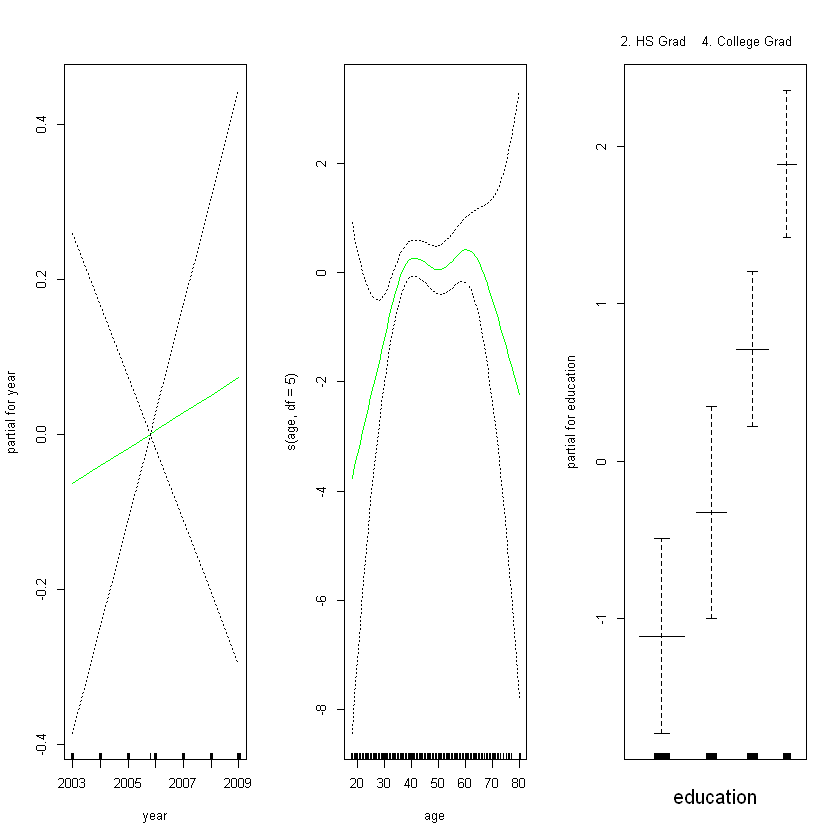

In [16]:
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage,subset=(education!="1. < HS Grad"))
par(mfrow=c(1,3))
plot(gam.lr.s,se=T,col="green")

> FIGURE 7.14. The same model is fit as in Figure 7.13, this time excluding the observations for which education is <HS. Now we see that increased education tends to be associated with higher salaries.
